In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
from sklearn.datasets import make_regression
x,y = make_regression(n_samples= 100, n_informative=1, n_features=1, n_targets=1, noise=20, random_state=10)

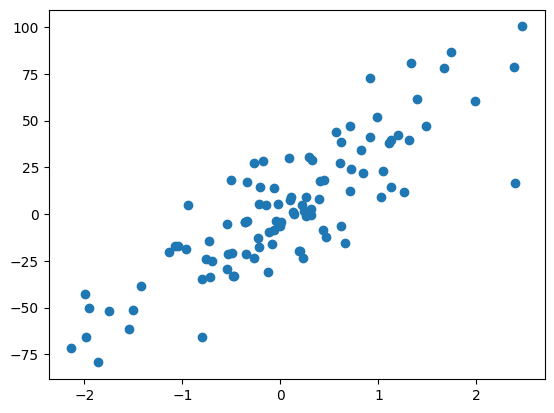

In [3]:
plt.scatter(x,y)

In [4]:
from sklearn.model_selection import cross_val_score

In [5]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.2, random_state=10)

In [6]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr.fit(x_train,y_train)
lr.coef_,lr.intercept_

(array([30.75284039]), 0.4656962015124668)

In [7]:
y_pred_lr = lr.predict(x_test)

In [8]:
from sklearn.metrics import r2_score
r2_score(y_test, y_pred_lr)

0.7593350129907419

In [9]:
class gdregressor:
    def __init__(self, learning_rate, epochs):
        self.m = 100
        self.b = -120
        self.lr = learning_rate
        self.epochs = epochs
    
    def fit(self, x,y):
        for i in range(self.epochs):
            loss_slope_b = -2*(np.sum(y - self.m*x.ravel() - self.b))
            loss_slope_m = -2*(np.sum((y - self.m*x.ravel() - self.b)*x.ravel()))

            self.b = self.b - self.lr * loss_slope_b
            self.m = self.m - self.lr * loss_slope_m
        print(self.m, self.b)

    def predict(self,x):
        return self.m * x + self.b

In [10]:
gd = gdregressor(0.01, 50)

In [11]:
gd.fit(x_train, y_train)

30.752840368507133 0.46569617055655343


In [12]:
y_pred_gd = gd.predict(x_test)
r2_score(y_test, y_pred_gd)

0.759335012687513